In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "20" 2023-03-21; OpenJDK Runtime Environment Zulu20.28+85-CA (build 20+36); OpenJDK 64-Bit Server VM Zulu20.28+85-CA (build 20+36, mixed mode, sharing)
  Starting server from /Users/Michael_Enudi/opt/anaconda3/envs/h2o_env/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/xl/w9y4tjx938vdwtkgzwxsxx8m0000gp/T/tmp3kikpnl_
  JVM stdout: /var/folders/xl/w9y4tjx938vdwtkgzwxsxx8m0000gp/T/tmp3kikpnl_/h2o_Michael_Enudi_started_from_python.out
  JVM stderr: /var/folders/xl/w9y4tjx938vdwtkgzwxsxx8m0000gp/T/tmp3kikpnl_/h2o_Michael_Enudi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Africa/Johannesburg
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_Michael_Enudi_rlhl2z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### Data ingestion

In [10]:
data = pd.read_csv('../../data/bike_rental_day_data.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Data dictionary

The Data Set contains the following information:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


### Data analysis

In [11]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
data['dteday'] = pd.to_datetime(data['dteday'])
data['season'] = data['season'].astype('category')
data['yr'] = data['yr'].astype('category')
data['mnth'] = data['mnth'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['workingday'] = data['workingday'].astype('category')
data['weathersit'] = data['weathersit'].astype('category')

#  because causual and registered as also dependent variables, we remove them. The sum of both equeals cnt
data.drop(columns=['casual', 'registered'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    category      
 3   mnth        731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  cnt         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(1)
memory usage: 40.8 KB


All fields are numeric. And there are no nas or nulls

In [17]:
# checking out instant
if 'instant' in data.columns:
    print((data['instant'].value_counts() > 1).sum()) # returns 0 meaning this field is not necessary to predict the counts
    data.drop(columns=['instant'], axis=1, inplace=True)

    # I believe I don't need the date as well as I have recreate date from the year, mnth and day
# if 'dteday' in data.columns:
#     data['day'] = data['dteday'].str.slice(start=8, stop=10).astype(int)
#     data.drop(columns=['dteday'], axis=1, inplace=True)

In [18]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


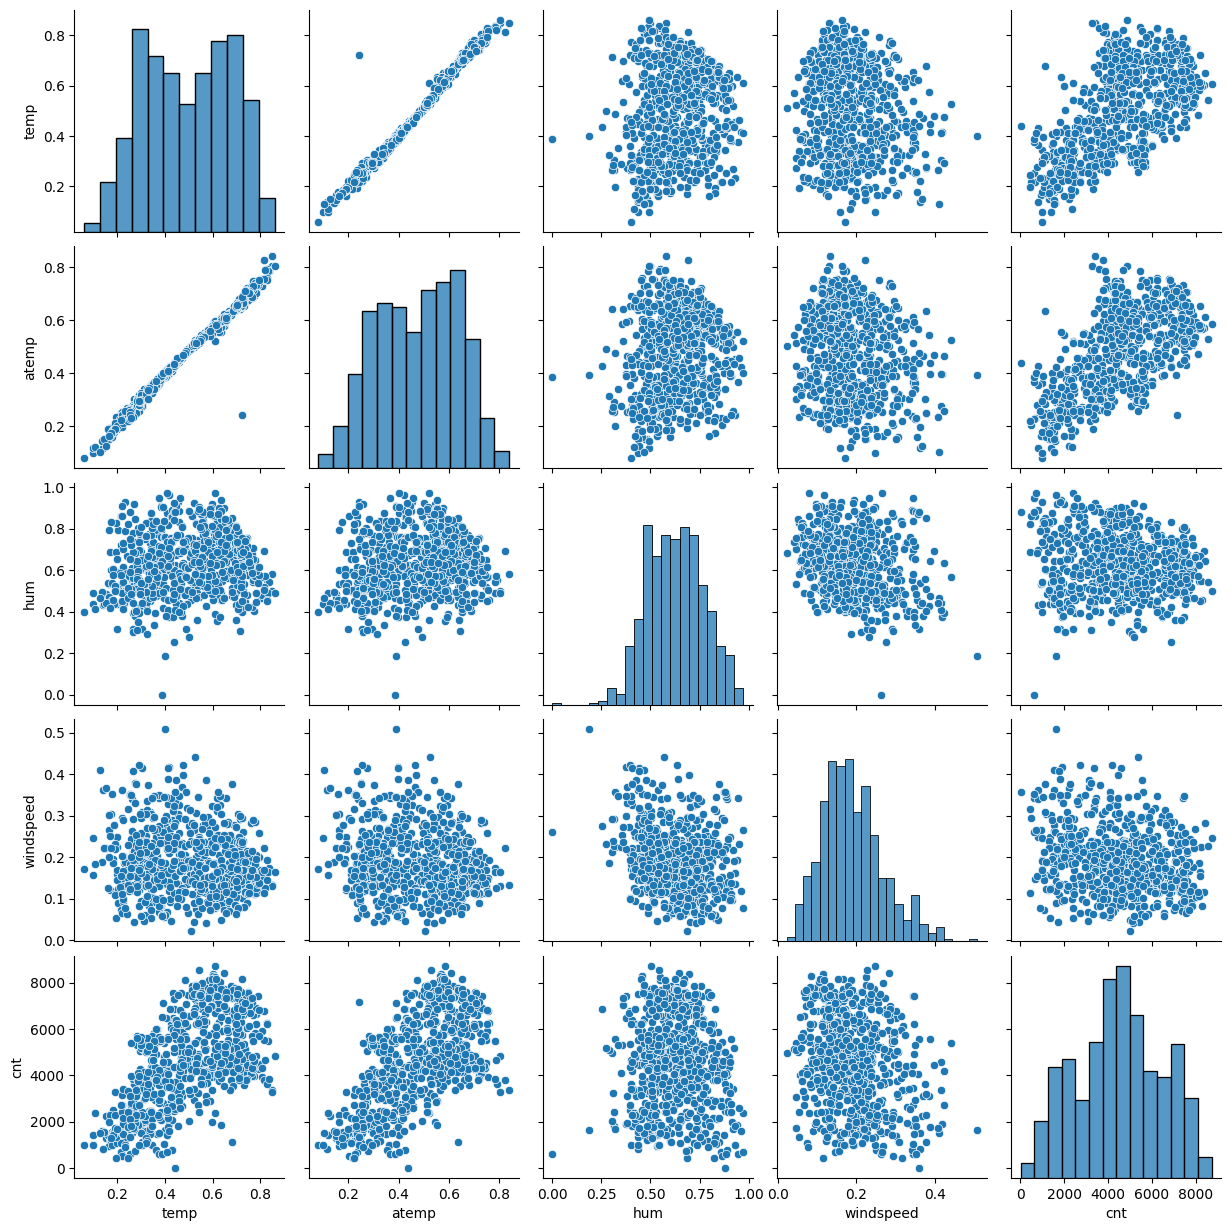

In [19]:
sns.pairplot(data)

In [20]:
# temp and atemp seem interesting
data[['temp', 'atemp']].corr()
# strongly correlation, having one one of them makes sense

,temp,atemp
temp,1.000000,0.991702
atemp,0.991702,1.000000


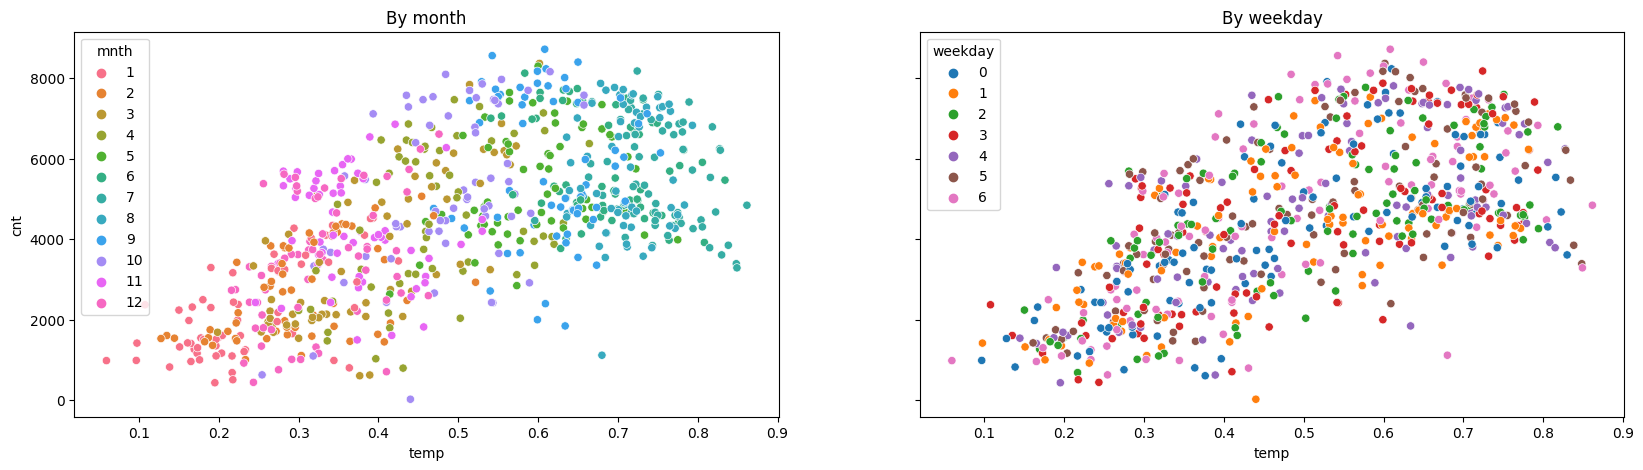

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20,5))
sns.scatterplot(data=data, x='temp', y='cnt', hue='weekday', ax=ax2)
sns.scatterplot(data=data, x='temp', y='cnt', hue='mnth', ax=ax1)
ax2.set_title('By weekday')
ax1.set_title('By month');


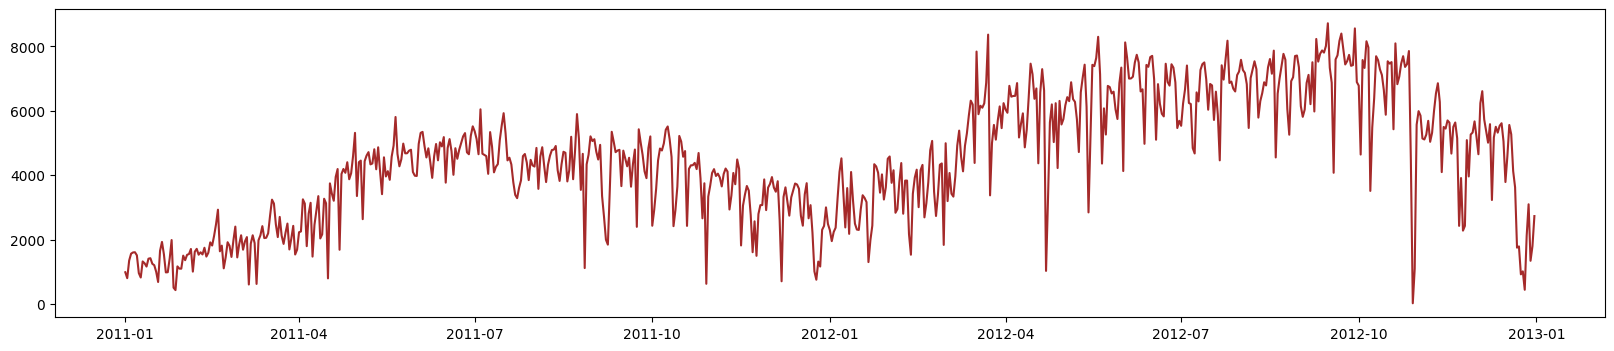

In [22]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.plot(data['dteday'], data['cnt'], c='brown')
plt.show()

<Axes: xlabel='weekday', ylabel='cnt'>

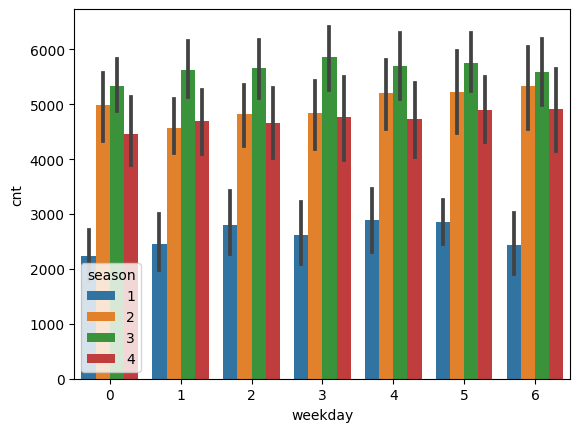

In [23]:
sns.barplot(x="weekday", y="cnt", hue="season", data=data)

In [37]:
# split dataset 
total_rec_count = len(data)
print(f'total rec count is  {total_rec_count}')
# # test will the last 150 records
train = data.iloc[:-150]
test = data.iloc[-150:]

print(f'Train shape is {train.shape}')
print(f'Test shape is {test.shape}')

print(train.iloc[-1, 0])
print(test.iloc[0, 0])

total rec count is  731
Train shape is (581, 13)
Test shape is (150, 13)
2012-08-03 00:00:00
2012-08-04 00:00:00


In [51]:
# Identify predictors and response
x = list(data.columns)
x.remove('dteday')
y = "cnt"
x.remove(y)

# convert pandas frame to h2o frame
h20_train_frame = h2o.H2OFrame(train)
h20_test_frame = h2o.H2OFrame(test)
h20_frame.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
2011-01-01 00:00:00,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
2011-01-02 00:00:00,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2011-01-03 00:00:00,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
2011-01-04 00:00:00,1,0,1,0,2,1,1,0.2,0.212122,0.590435,0.160296,1562
2011-01-05 00:00:00,1,0,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869,1600
2011-01-06 00:00:00,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,1606
2011-01-07 00:00:00,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,1510
2011-01-08 00:00:00,1,0,1,0,6,0,2,0.165,0.162254,0.535833,0.266804,959
2011-01-09 00:00:00,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.36195,822
2011-01-10 00:00:00,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,1321


In [53]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=h20_train_frame)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),10/20
# GBM base models (used / total),2/7
# XGBoost base models (used / total),3/6
# DeepLearning base models (used / total),4/4
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [54]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230607_63702,548.984,301384,382.812,0.192717,301384
StackedEnsemble_BestOfFamily_1_AutoML_1_20230607_63702,551.278,303908,384.747,0.192171,303908
GBM_2_AutoML_1_20230607_63702,571.88,327046,401.933,0.204474,327046
GBM_4_AutoML_1_20230607_63702,574.357,329886,405.527,0.209787,329886
GBM_grid_1_AutoML_1_20230607_63702_model_2,583.788,340808,408.162,0.209309,340808
GBM_3_AutoML_1_20230607_63702,585.349,342633,407.812,0.213501,342633
XGBoost_grid_1_AutoML_1_20230607_63702_model_2,596.692,356042,428.117,0.220841,356042
DeepLearning_grid_1_AutoML_1_20230607_63702_model_1,600.646,360775,440.649,0.22256,360775
GBM_5_AutoML_1_20230607_63702,602.707,363256,407.148,0.224935,363256
DRF_1_AutoML_1_20230607_63702,605.001,366026,424.262,0.226888,366026


In [55]:
best_model = aml.leader

In [57]:
y_pred = best_model.predict(test_data=h20_test_frame)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


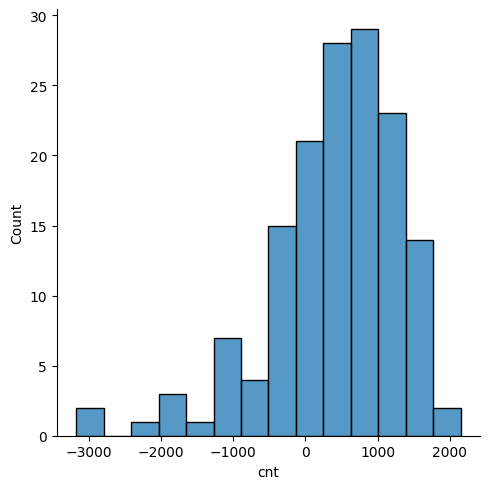

In [86]:
y_error = h2o.as_list(h20_test_frame['cnt'] - y_pred)
sns.displot(x=y_error['cnt'], kind='hist');
